# Download all images & save them for easy loading

In [2]:
import PIL
import requests
import io
import matplotlib.pyplot as plt
import numpy as np
import torch
from torchvision import transforms

In [1]:
cd ..

/Users/adil.quettawala/Documents/APS360/Project/APS360-project


## Get image urls

In [10]:
import pandas as pd

df = pd.read_csv('data_collection/data/balanced_animes_data_max_rank=5000.csv')
df = df[['unique_id', 'id', 'main_picture_medium', 'popularity']]
max = df['popularity'].max()
min = df['popularity'].min()
df['popularity'] = (df['popularity'] - min)/(max-min)

## Download images

In [12]:
def get_file(path, transforms):
    response = requests.get(path).content
    img = PIL.Image.open(io.BytesIO(response))
    img = img.convert('RGB')
    img = transforms(img)
    # plt.imshow(img.permute(1, 2, 0))
    return img

In [13]:
image_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    transforms.RandomCrop(464, pad_if_needed=True),
])

In [14]:
imgs = []
for row in df.iterrows():
    unique_id, file_path, label = row[1]['unique_id'], row[1]['main_picture_medium'], row[1]['popularity']
    # print(unique_id)
    imgs.append((get_file(file_path, image_transforms), label))

print('finished')

finished


In [8]:
import os
os.mkdir('imgs')

In [3]:
import pickle
for i, img in enumerate(imgs):
    pickle.dump(img, open(f'imgs/{i}', 'wb'))

NameError: name 'imgs' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.0058011602320464095


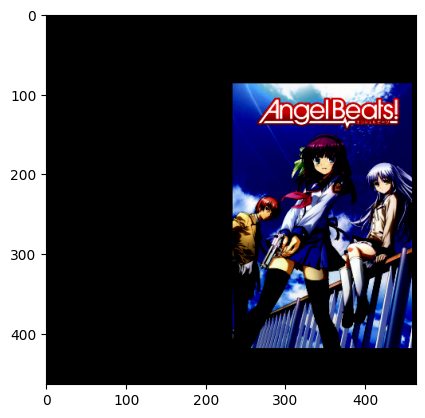

In [3]:
import numpy as np
import pickle
# rand = np.random.randint(100)
rand = 26
import torch
import matplotlib.pyplot as plt

img, rank = pickle.load(open(f'imgs/{int(rand)}', 'rb'))
# imshow needs the dimensions in a different order
plt.imshow(img.permute(1, 2, 0))
print(rank)